In [1]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
import math
from sklearn.cluster import KMeans

# Banknote Authentication
We use a simplified dataset of scanned banknote data (wavelet transformation), containing 2 features, named *V1* and *V2* scores.

We aim to use clustering as a means to understand if these features can be used to distinguish forged banknotes from real ones.

## 1. Exploratory Data Analysis
Load data and perform simple mean and standard deviation calculation.

In [2]:
df = pd.read_csv('Banknote-authentication-dataset.csv')

In [3]:
df

,V1,V2
0,3.62160,8.66610
1,4.54590,8.16740
2,3.86600,-2.63830
3,3.45660,9.52280
4,0.32924,-4.45520
...,...,...
1367,0.40614,1.34920
1368,-1.38870,-4.87730
1369,-3.75030,-13.45860
1370,-3.56370,-8.38270


In [4]:
df.mean(axis=0)

V1    0.433735
V2    1.922353
dtype: float64

In [8]:
df.std(axis=0)

V1    2.842763
V2    5.869047
dtype: float64

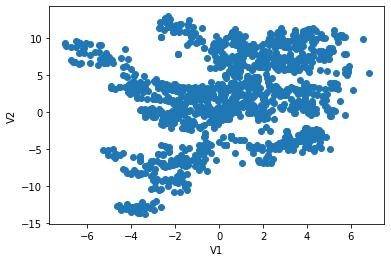

In [10]:
pl.scatter(df['V1'], df['V2'])
pl.xlabel('V1')
pl.ylabel('V2')
pl.show()

Perform some scaling to a score of -1 to 1.

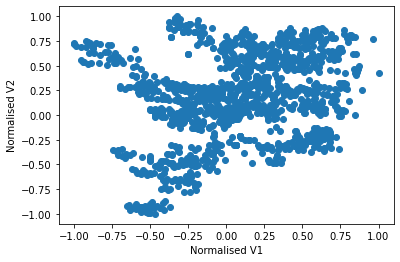

In [5]:
v1_norm = (df['V1'] - df['V1'].min())/(df['V1'].max() - df['V1'].min())*2-1
v2_norm = (df['V2'] - df['V2'].min())/(df['V2'].max() - df['V2'].min())*2-1

pl.scatter(v1_norm, v2_norm)
pl.xlabel('Normalised V1')
pl.ylabel('Normalised V2')
pl.show()

## 2. *K*-means clustering

In [6]:
color = ['b', 'g']

### First run

In [7]:
data_normed = np.column_stack((v1_norm, v2_norm))
df_normed = pd.DataFrame(data=data_normed, columns=['V1_norm', 'V2_norm'])
df_normed_results = pd.DataFrame(data=data_normed, columns=['V1_norm', 'V2_norm'])
df_cluster_centers = pd.DataFrame(data=None, columns=['V1_cen', 'V2_cen'])
num_clusters = 2

In [8]:
def cluster_and_plot(num_clusters=2):
    # Perform k-means, extract cluster centers and cluster map
    km_result = KMeans(n_clusters=num_clusters).fit(df_normed)
    cluster_centers = km_result.cluster_centers_
    df_cluster_centers.append(pd.DataFrame(data=cluster_centers, columns=['V1_cen', 'V2_cen']))
    cluster_map = km_result.predict(df_normed)

    # Trial number is the number of times clustering was performed after loading the data
    # Useful to perform clustering several times, and compare results
    trial_number = len(df_normed_results.columns)-2
    # Insert cluster map into df for plotting purpose
    df_normed_results.insert(2, 'label_trial{}'.format(trial_number+1), cluster_map)
    
    for i in np.arange(num_clusters):
        ax[trial_number%5, math.floor(trial_number/5)].scatter(df_normed_results[df_normed_results['label_trial{}'.format(trial_number+1)]==i]['V1_norm'], 
                   df_normed_results[df_normed_results['label_trial{}'.format(trial_number+1)]==i]['V2_norm'], 
                   label="Cluster {}".format(i+1), c=color[i])
    ax[trial_number%5, math.floor(trial_number/5)].scatter(cluster_centers[:,0], cluster_centers[:1], c='r', marker='x', label='Cluster centers')

    ax[trial_number%5, math.floor(trial_number/5)].set_xlabel('Normalised V1')
    ax[trial_number%5, math.floor(trial_number/5)].set_ylabel('Normalised V2')
    ax[trial_number%5, math.floor(trial_number/5)].set_title('Trial {}'.format(trial_number+1))

    ax[trial_number%5, math.floor(trial_number/5)].legend()

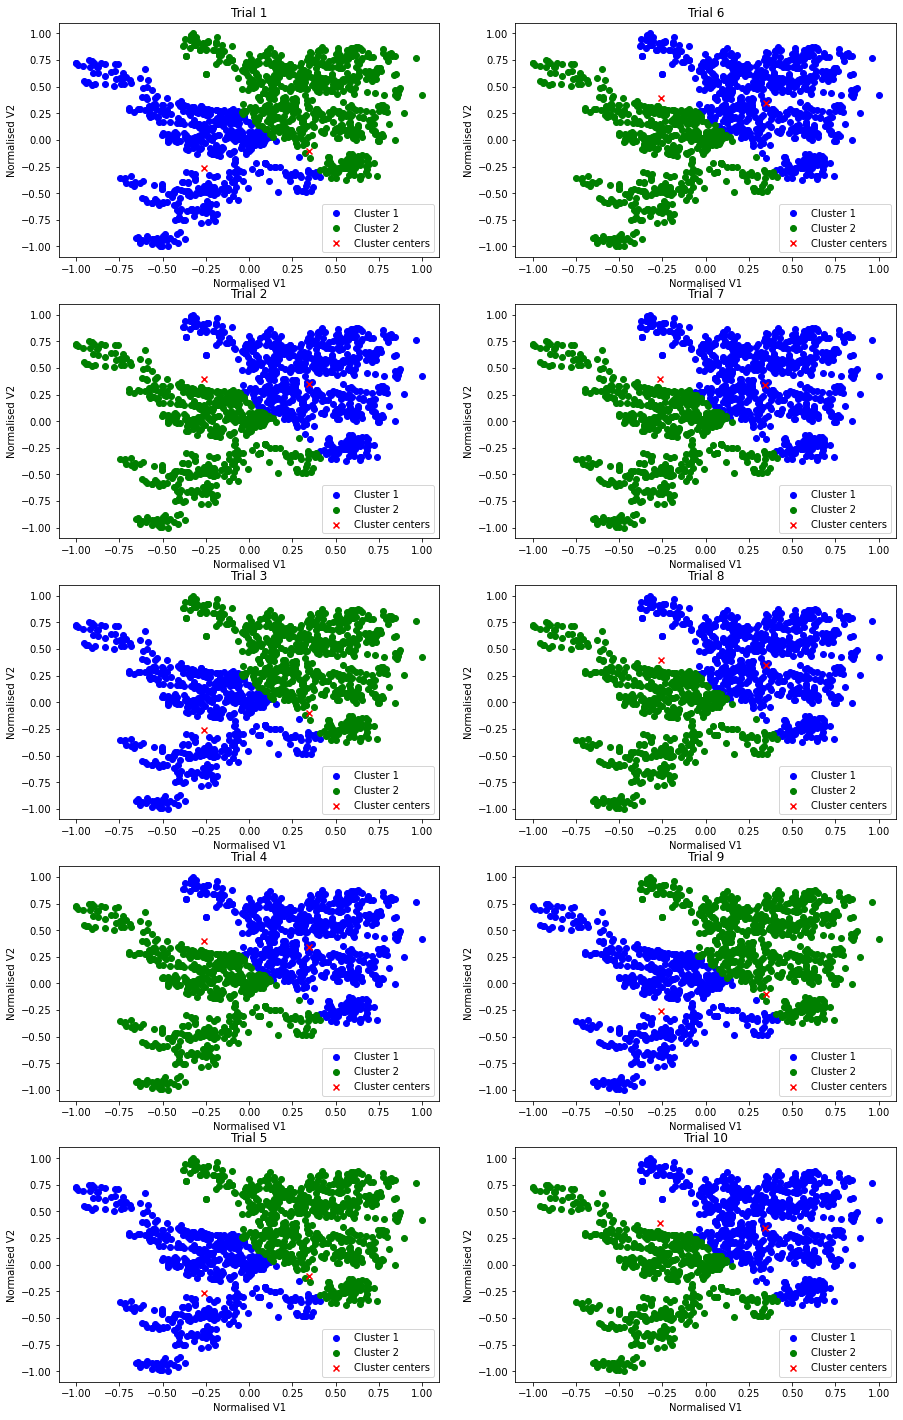

In [9]:
num_of_trials=10

fig, ax = pl.subplots(5, math.ceil(num_of_trials/5), figsize=(15,25))

# Perform 10 trials
for i in np.arange(num_of_trials):
    cluster_and_plot()

In [10]:
df_normed_results

,V1_norm,V2_norm,label_trial10,label_trial9,label_trial8,label_trial7,label_trial6,label_trial5,label_trial4,label_trial3,label_trial2,label_trial1
0,0.538008,0.679285,0,1,0,0,0,1,0,1,0,1
1,0.671318,0.641964,0,1,0,0,0,1,0,1,0,1
2,0.573257,-0.166703,0,1,0,0,0,1,0,1,0,1
3,0.514210,0.743398,0,1,0,0,0,1,0,1,0,1
4,0.063156,-0.302675,1,0,1,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1367,0.074247,0.131710,0,1,0,0,0,1,0,1,0,1
1368,-0.184619,-0.334264,1,0,1,1,1,0,1,0,1,0
1369,-0.525229,-0.976464,1,0,1,1,1,0,1,0,1,0
1370,-0.498316,-0.596598,1,0,1,1,1,0,1,0,1,0


Determine how many points have switched clusters out of the 10 clusters.

First, need to identify which cluster centroids have been swapped, compared to the other ones.

We believe that the data point with lowest *V1* score (-1.0) will always be in the same cluster.

In [12]:
df_normed_results[df_normed_results['V1_norm']==df_normed['V1_norm'].min()]

,V1_norm,V2_norm,label_trial10,label_trial9,label_trial8,label_trial7,label_trial6,label_trial5,label_trial4,label_trial3,label_trial2,label_trial1
1233,-1.0,0.719241,1,0,1,1,1,0,1,0,1,0


Therefore, let's use this point as a reference, and swap clusters so that cluster 0 is the cluster with higher *V1* score, and cluster 1 the lower.

In [20]:
reference_index = df_normed_results[df_normed_results['V1_norm']==df_normed['V1_norm'].min()].index[0]

In [26]:
def calibrate_label(df_normed_):
    for i in np.arange(1,num_of_trials+1):
        if df_normed_['label_trial{}'.format(i)].iloc[reference_index] == 0:
            df_normed_['label_trial{}'.format(i)] = df_normed_['label_trial{}'.format(i)].rsub(1)

In [27]:
calibrate_label(df_normed_results)

In [28]:
df_normed_results

,V1_norm,V2_norm,label_trial10,label_trial9,label_trial8,label_trial7,label_trial6,label_trial5,label_trial4,label_trial3,label_trial2,label_trial1
0,0.538008,0.679285,0,0,0,0,0,0,0,0,0,0
1,0.671318,0.641964,0,0,0,0,0,0,0,0,0,0
2,0.573257,-0.166703,0,0,0,0,0,0,0,0,0,0
3,0.514210,0.743398,0,0,0,0,0,0,0,0,0,0
4,0.063156,-0.302675,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1367,0.074247,0.131710,0,0,0,0,0,0,0,0,0,0
1368,-0.184619,-0.334264,1,1,1,1,1,1,1,1,1,1
1369,-0.525229,-0.976464,1,1,1,1,1,1,1,1,1,1
1370,-0.498316,-0.596598,1,1,1,1,1,1,1,1,1,1


This makes more sense, most of the points should be in same cluster over the 10 trials.

Now we can check what fraction of points have assigned to the other cluster throughout the 10 trials.

We can sum the cluster number up. If the point has only been assigned to cluster 0, it should sum to 0, otherwise, it should sum to ```num_of_trials```. Those points having count falling between these 2 numbers would be the points which have fluctuated.

In [50]:
df_normed_analyse = df_normed_results[['V1_norm', 'V2_norm']].copy()
df_normed_aggregate = df_normed_results[['label_trial{}'.format(i) for i in np.arange(1,num_of_trials+1)]]

In [51]:
df_normed_analyse.insert(2, 'Averaged_cluster_{}trials'.format(num_of_trials), df_normed_aggregate.sum(axis=1)/num_of_trials)

In [52]:
df_normed_analyse[(df_normed_analyse['Averaged_cluster_{}trials'.format(num_of_trials)]>0) & (df_normed_analyse['Averaged_cluster_{}trials'.format(num_of_trials)]<1)]

,V1_norm,V2_norm,Averaged_cluster_10trials
635,0.289228,-0.157573,0.8
748,0.139092,0.031358,0.3
775,-0.036982,0.247228,0.2
818,0.050853,0.140997,0.2
987,-0.064590,0.271236,0.8
1054,-0.028221,0.229267,0.8
1074,-0.044855,0.248471,0.8
1318,-0.055407,0.259778,0.8


In [53]:
df_fluctuate = df_normed_analyse[(df_normed_analyse['Averaged_cluster_{}trials'.format(num_of_trials)]>0) & (df_normed_analyse['Averaged_cluster_{}trials'.format(num_of_trials)]<1)].copy()

So we can see that out of the 1372 points, 8 points have been assigned to a different cluster.

7 points have 20% of time assigned to other cluster and 1 point has 30% of time.

So the clustering algorithm is relative stable.

Let's see where these points are located:

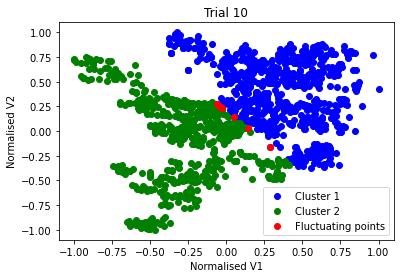

In [57]:
trial_number_analyse = 9

fig, ax = pl.subplots()

for i in np.arange(num_clusters):
    ax.scatter(df_normed_results[df_normed_results['label_trial{}'.format(trial_number_analyse+1)]==i]['V1_norm'], 
               df_normed_results[df_normed_results['label_trial{}'.format(trial_number_analyse+1)]==i]['V2_norm'], 
               label="Cluster {}".format(i+1), c=color[i])
ax.scatter(df_fluctuate['V1_norm'], df_fluctuate['V2_norm'], label='Fluctuating points', c='r')

ax.set_xlabel('Normalised V1')
ax.set_ylabel('Normalised V2')
ax.set_title('Trial {}'.format(trial_number_analyse+1))

ax.legend()